<h1><center>Laboratorio 8: ¿Superhéroe o Villano? 🦸</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Diego Cortez
- Nombre de alumno 2: Christopher Stears


### **Link de repositorio de GitHub:** [https://github.com/CHSTR/MDS7202_LAB](https://github.com/CHSTR/MDS7202_LAB)

## Temas a tratar

- Codificación de texto usando Bag of Words.
- Búsqueda del modelo óptimo de clasificación usando `GridSearch`
- Uso de pipelines.

## Reglas:

- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Obtener caracteristicas a partir de texto usando `CountVectorizer`.
- Fijar un pipeline con un modelo base que luego se irá optimizando.
- Comprender como realizar una búsqueda de grilla sobre un conjunto de clasificadores e hiperparámetros usando `GridSearch`.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

#Importamos librerias utiles 😸

In [1]:
# Librería Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

# Clasifación
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

# Librería para plotear
!pip install --upgrade plotly
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Proyecciones en baja dimensionalidad: UMAP
!pip install umap-learn

# Librería para NLP
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Diego\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 1. ¿Quien es Bat Cow?

<p align="center">
  <img src="https://i.imgur.com/D9f1RHy.jpg" width="350">
</p>

En vez de estar desarrollando las evaluaciones correspondientes a su curso, su profesor de catedra y su auxiliar discuten acerca la alineación (héroe o villano) del personaje de ficción Bat-Cow. 

El cuerpo docente, no logra ponerse de acuerdo si el personaje es bueno, neutral o malo: el auxiliar plantea que Bat-cow posee una siniestra mirada, intrigante pero común característica de los personajes malvados. 
Por otra parte, extendiendo las ideas de Rousseau, el profesor plantea que tal como los humanos no nacen malos, no existe motivo por el cual una vaca con superpoderes deba serlo.

Sin embargo, ambos concuerdan que es difícil estimar la alineación solo usando los atributos físicos, por lo que creen el análisis debe ser complementado aún más antes de comunicarle los resultados a su estudiantado. Buscando más información, ambos sujetos se percatan de la existencia de un excelente antecedente para estimar la alineación: la historia personal de cada superhéroe o villano.

Es por esto le solicitan que construya y optimice un clasificador basado en texto el cual analice la alineación de cada personaje basado en su historia personal.

Para este laboratorio deben trabajar con los datos `df_comics.csv` y `comics_no_label.csv` subidos a u-cursos. El primero es un conjunto de datos que les servirá para entrenar un modelo de clasificación, mientras que el segundo es un dataset con personajes de ficción no etiquetados a predecir (sí, aquí está la misteriosa Batcow).

Para comenzar cargue los dataset señalados y visualice a través de un head los atributos que poseen cada uno de los dataset.


In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [3]:
df_comics = pd.read_csv('df_comics.csv', index_col = 0)
df_comics_no_label = pd.read_csv('comics_no_label.csv', index_col = 0)
df_comics = df_comics.dropna(subset=['history_text']) # eliminar ejemplos sin historia

In [4]:
# queda a labor de su equipo hacer el análisis exploratorio
df_comics.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Aayla Secura,Aayla Secura,NaN,8,ayla Secura was a Rutian Twi'lek Jedi Knight (...,NaN,90,40,45,55,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df_comics.shape

(1285, 81)

## 1.1 Obtención de Features y Bag of Words

<p align="center">
  <img src="https://media0.giphy.com/media/eIUpSyzwGp0YhAMTKr/200.gif" width="300">
</p>

Primero que todo, deben obtener un vector de características del atributo `history_text`, utilizando `Bag of Words`. En este atributo se presenta una breve descripción de la historia de cada uno de los personajes de ficción presentes en el dataset. 

Pero... antes de empezar, ¿Que es `Bag of Words`?...

`Bag of Words` es un modelo de conteo utilizado en Procesamiento de Lenguaje Natural (NLP) que tiene como objetivo generar una representación vectorial (vector de características en nuestro cas) para cada documento a través del conteo de las palabras que contienen. 

La siguiente figura muestra un ejemplo de `Bag of Words` en acción:

<p align="center">
  <img src="https://user.oc-static.com/upload/2020/10/23/16034397439042_surfin%20bird%20bow.png" width="500">
</p>

Como pueden ver, el modelo de `Bag of Words` no resulta tan complicado, ¿pero cómo lo aplicamos en python?. 

Como podrán darse cuenta del ejemplo anterior, para facilitar el conteo será necesario transformar cada uno de los documentos en vectores, donde cada una de las posiciones posee un carácter. Este proceso es conocido como **tokenización** y lo podemos realizar de la siguiente forma:

In [6]:
docs = ['The teacher rocks like a good rock & roll',
             'the rock is the best actor in the world']


docs_tokenizados = [word_tokenize(doc)  for doc in docs]
docs_tokenizados

[['The', 'teacher', 'rocks', 'like', 'a', 'good', 'rock', '&', 'roll'],
 ['the', 'rock', 'is', 'the', 'best', 'actor', 'in', 'the', 'world']]

Podemos mejorar un poco más el proceso de tokenización agregando 

- Stemming:  Definimos Stemming como un algoritmo basado en reglas que transforma las palabras a una forma general. Un ejemplo de stemming, es el siguiente:
- Eliminación de Stopwords: Eliminación de palabras muy frecuentes que entorpecen la clasificación (por ejemplo, el, la los, la, etc...)

<p align="center">
  <img src="https://devopedia.org/images/article/218/8583.1569386710.png" width="300">
</p>


In [7]:
# Definimos algunas stopword que queremos que sean eliminadas
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Definimos un tokenizador con Stemming.
# Fixed: Se definen las stopwords en la clase (más ordenado), se especifica el idioma
# Fixed: Se aplica Stemming antes de eliminar stopwords, para no tener problemas con las mayúsculas
class StemmerTokenizer:
    def __init__(self, language):
        self.ps = PorterStemmer()
        self.stop_words = stopwords.words(language)
    def __call__(self, doc):
        doc_tok = word_tokenize(doc)
        doc_tok = [self.ps.stem(t) for t in doc_tok]
        return [t for t in doc_tok if t not in self.stop_words]

# Inicializamos tokenizador
tokenizador = StemmerTokenizer("english")

# Creamos algunos documentos
docs = ['The teacher rocks like a good rock & roll',
        'The rock is the best actor in the world',
        'New York is a beautiful city']

# Obtenemos el token del primer documento
[tokenizador(doc) for doc in docs]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['teacher', 'rock', 'like', 'good', 'rock', '&', 'roll'],
 ['rock', 'best', 'actor', 'world'],
 ['new', 'york', 'beauti', 'citi']]

In [8]:
# Comparación con el caso anterior
docs_tokenizados = [word_tokenize(doc) for doc in docs]
docs_tokenizados

[['The', 'teacher', 'rocks', 'like', 'a', 'good', 'rock', '&', 'roll'],
 ['The', 'rock', 'is', 'the', 'best', 'actor', 'in', 'the', 'world'],
 ['New', 'York', 'is', 'a', 'beautiful', 'city']]

#### Al Estilo Scikit

Scikit implementa `bag of words` a través de la clase `CountVectorizer()` la cual contiene muchas opciones para mejorar la tokenización.

In [9]:
bow = CountVectorizer(tokenizer= StemmerTokenizer("english"))
df = bow.fit_transform(docs)

pd.DataFrame(df.toarray(), columns=bow.get_feature_names_out())

,&,actor,beauti,best,citi,good,like,new,rock,roll,teacher,world,york
0,1,0,0,0,0,1,1,0,2,1,1,0,0
1,0,1,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,0,0,1


Una de las cosas más interesantes que provee son el use de n-gramas, los cuales, en palabras simples, son conjuntos de n-palabras que se concatenan entre si y que se consideran como tokens separados. 

Pensemos en `Nueva York`. Cuando se tokeniza Nueva York, se generan dos tokens independientes que a simple vista no tienen relación: `Nueva` `York`.
Al usar n-gramas (en un rango min=1,max=2) , generamos tanto `Nueva` y `York` como también `Nueva York` como un token independiente.

In [10]:
bow = CountVectorizer(tokenizer= StemmerTokenizer("english"), ngram_range=(1,2))
df = bow.fit_transform(docs)

pd.DataFrame(df.toarray(), columns=bow.get_feature_names_out())

,&,& roll,actor,actor world,beauti,beauti citi,best,best actor,citi,good,...,rock,rock &,rock best,rock like,roll,teacher,teacher rock,world,york,york beauti
0,1,1,0,0,0,0,0,0,0,1,...,2,1,0,1,1,1,1,0,0,0
1,0,0,1,1,0,0,1,1,0,0,...,1,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


De los resultados, podemos ver que generamos vectores de conteo para cada una de las palabras que conforman el corpus.  Un punto extra que se agrega en esta obtención de frecuencias son los bigramas, que básicamente son el conjunto de palabras de tamaño de aparecen juntas en el texto.

## Codificando los Super{heroes, villanos}  [0.5 Puntos]

<p align="center">
  <img src="https://c.tenor.com/LkQzw7k5DV4AAAAd/anime-hacking.gif" width="300">
</p>

Conociendo ahora que es el proceso de `bag of words`, aplique este modelo de obtención de caracteristicas de la siguiente forma en un pipeline:

- Utilice el tokenizador entregado.
- Obtenga caracteristicas de los unigramas y bigramas del texto (tal como el ejemplo).

```python
bog = CountVectorizer(tokenizer= StemmerTokenizer(),`
                      ngram_range=(1,2) # Este punto es opcional y es para generar bigramas
                      )
```

Finalmente, aplique `MinMaxScaler()` sobre `atributos_de_interes` y concatene el valor obtenido con el matriz de caracteristicas obtenidas con bag of words.

```python
atributos_de_interes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']
```

No es necesario que obtenga un dataframe en concreto con las características solicitadas. Se le recomienda generar un `ColumnTransformer()` para aplicar las transformaciones solicitadas en un pipeline.

**To-Do:**
- [ ] Obtener a traves de Bag of Words (`CountVectorizer`) caracteristicas del resumen de historia de cada personaje.
- [ ] Aplicar `MinMaxScaler` sobre los atributos de interes.

**Respuesta:**

Había errores en esta celda. Las stopwords estaban en español pero las descripciones están en inglés. Adicionalmente, se debe convertir a minúscula. Esto ya lo hace el Stemmer, pero si eliminamos stopwords manualmente antes de aplicar el stemmer, no va a reconocer las stopwords con mayúscula. Invertimos el orden para arreglar esto.

Creamos el column transformer para aplicar minmax a los atributos de interés y CountVectorizer a history text.

In [11]:
# Fixed: Se definen las stopwords en la clase (más ordenado), se especifica el idioma
# Fixed: Se aplica Stemming antes de eliminar stopwords, para no tener problemas con las mayúsculas
class StemmerTokenizer:
    def __init__(self, language):
        self.ps = PorterStemmer()
        self.stop_words = stopwords.words(language)
    def __call__(self, doc):
        doc_tok = word_tokenize(doc)
        doc_tok = [self.ps.stem(t) for t in doc_tok]
        return [t for t in doc_tok if t not in self.stop_words]

atributos_de_interes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']

ct = ColumnTransformer([
    ("MinMax", MinMaxScaler(), atributos_de_interes),
    ("BagOfWords", CountVectorizer(tokenizer= StemmerTokenizer("english"), ngram_range=(1,2)), "history_text"),
])

Probamos el column transformer

In [12]:
features = ct.fit_transform(df_comics)

In [13]:
25000/features.shape[1]

0.07531935406121958

In [14]:
np.max(features[:, :6])

1.0

In [15]:
np.max(features[:, 6:])

1600.0

In [16]:
np.mean(features[:, 6:])

0.00302915885880997

Vemos que el minmax scaler funcionó ya que el máximo de las primeras 6 columnas (atributos_de_interes) es 1. Por otro lado, la palabra con más repeticiones en alguna historia se repite 1600 veces. El diccionario contiene 331914 palabras, las cuales en promedio aparecen 0.003 veces por historia.

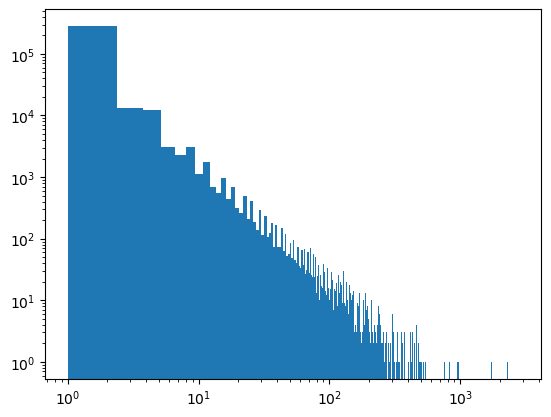

In [17]:
import matplotlib.pyplot as plt

apariciones = np.array(np.sum(features[:, 6:], axis=0))[0]
plt.hist(apariciones[apariciones<8000], bins =2000)
plt.yscale("log")
plt.xscale("log")
plt.show()

In [18]:
np.sum(apariciones==1) / len(apariciones)

0.7440300800809848

Podemos notar cómo en el Bag of Words el número de veces que aparece una palabra es inversamente proporcional a la cantidad de palabras que aparece ese número de veces. De esta forma, las palabras que aparecen 1 sóla vez (el 74%) son 10 veces más que las palabras que aparecen 2-3 veces, las cuales a su vez son 10 veces más que las palabras que aparecen 10 veces, y así sucesivamente.

## 1.2 Diseño de Baseline y  Primer Entrenamiento  [1 Puntos]


<p align="center">
  <img src="https://pa1.narvii.com/6374/9eaec1b7bf9157334151452a669516f9a78b954c_hq.gif" width="300">
</p>



Genere un Pipeline con las caracteristicas solicitadas en la sección 1.1, un selector de mejores features `SelectPercentile` con métrica `f_classif` y percentile=90 y un clasificador `MultinomialNB()` por defecto.

Luego, separe el conjunto de datos en un conjunto de entrenamiento y prueba, donde las etiquetas estará dado por el atributo `alignment`. 

Entrene el modelo y reporte el desempeño con un `classification_report`. ¿ Nos recomendaría predecir la alineación de BatCow con este clasificador?.

Finalmente, compare el modelo entrenado con un modelo Dummy estratificado y responda: ¿El clasificador entrenado es mejor que el dummy que entrega respuestas al azar?

**To-do:**
- [ ] Realizar un pipeline con las caracteristicas solicitadas en 1.1, ejecutar holdout y aplicar un clasificador `MultinomialNB()`.
- [ ] Entrenar el pipeline, calcular el `classification_report` asociado y comentar los resultados.
- [ ] Entrenar un `DummyClassifier` con estrategia `statified`, calcular el `classification_report` asociado y comentar que implican los scores obtenidos en comparación con los resultados del baseline.

**Respuesta:**

In [19]:
#Creamos el pipeline. El selector de atributos sólo descartará un 10% de las columnas
pipeline_nb = Pipeline([
    ("ColumnTransformer", ct),
    ("FeatureSelection",  SelectPercentile(f_classif, percentile = 90)),
    ("Classifier",        MultinomialNB())
])

# Separamos el target del dataframe.
# Sí... esto ya lo hace el columntransformer, pero es mejor ser más ordenados y asegurarse que el target no está siendo usado
X = df_comics[df_comics.columns.difference(["alignment"])]
y = df_comics.alignment

# Seperamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, shuffle = True, random_state = 1991)

Calculamos las frecuencias de clase. Nos percatamos que el dataset está levemente desbalanceado, pero no debería tener problemas para diferenciar entre Good y Bad. Vemos que los porcentajes entre train y test son muy parecidos.

In [20]:
y_train.value_counts() / len(y_train)

Good       0.583658
Bad        0.332685
Neutral    0.083658
Name: alignment, dtype: float64

In [21]:
y_test.value_counts() / len(y_test)

Good       0.556420
Bad        0.338521
Neutral    0.105058
Name: alignment, dtype: float64

Entrenamos el pipeline 

In [22]:
pipeline_nb.fit(X_train, y_train)
pass

Predecimos y guardamos las predicciones en variables porque el pipeline es muy lento ya que realiza el Bag of Words en cada predicción.

In [23]:
preds_train = pipeline_nb.predict(X_train)
preds_test  = pipeline_nb.predict(X_test)

Realizamos el classification report.

In [24]:
print(  "<<--Métricas en datos de entrenamiento-->>")
print(classification_report(y_train, preds_train))
print("\n<<--Métricas en datos de validación--->>")
print(classification_report(y_test, preds_test))

<<--Métricas en datos de entrenamiento-->>
              precision    recall  f1-score   support

         Bad       0.96      1.00      0.98       342
        Good       0.97      0.99      0.98       600
     Neutral       1.00      0.65      0.79        86

    accuracy                           0.97      1028
   macro avg       0.97      0.88      0.92      1028
weighted avg       0.97      0.97      0.96      1028


<<--Métricas en datos de validación--->>
              precision    recall  f1-score   support

         Bad       0.80      0.05      0.09        87
        Good       0.56      0.99      0.72       143
     Neutral       0.00      0.00      0.00        27

    accuracy                           0.57       257
   macro avg       0.45      0.35      0.27       257
weighted avg       0.58      0.57      0.43       257



C:\ProgramData\Miniconda3\envs\datamining\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\datamining\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\datamining\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> ¿Nos recomendaría predecir la alineación de BatCow con este clasificador?.

Debido a que el clasificador tiene pésimas métricas en validación, no sería recomendable usar este clasificador para predecir el alineamiento de BatCow. Como el clasificador obtuvo excelentes métricas en entrenamiento pero pésimas métricas en validación, este es un clásico ejemplo de **sobreajuste**. El sobreajuste en clasificadores como Naive Bayes no es tan común debido a lo simple de este modelo. Sin embargo, en este caso tenemos del orden de 1000 datos con **cientos de miles** de atributos, por lo que incluso los modelos más simples pueden sobreajustarse. Más aún si consideramos que casi la totalidad de los atributos corresponden a una matriz sparse de ocurrencias de palabras, las cuales la mayoría (>70%) sólo aparecen una sóla vez, de manera tal que el clasificado podría sólo aprenderse estas palabras para clasificar, lo cual no es en absoluto generalizable.

Para arreglar este problema, se debería disminuir drásticamente el percentil de atributos a utilizar. Convendría jugar variando entre **0.1 y 20%**. Idealmente, se deberían combinar distintos criterios de selección de atributos para incluir el número de veces que aparece una palabra, de manera que se descarten palabras que aparecen muy pocas veces. También sería conveniente cambiar el clasificador a uno más robusto a este tipo de errores.

Entrenamos un modelo Dummy y comparamos. No necesitamos recrear todo el pipeline ya que `DummyClassifier` simplemente ignora los atributos.

In [25]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = "stratified", random_state = 1991)
dummy.fit(X_train, y_train)
print(  "<<--Métricas en datos de entrenamiento-->>")
print(classification_report(y_train, dummy.predict(X_train)))

dummy.fit(X_test, y_test)
print(  "<<--Métricas en datos de validación-->>")
print(classification_report(y_test, dummy.predict(X_test)))

<<--Métricas en datos de entrenamiento-->>
              precision    recall  f1-score   support

         Bad       0.34      0.33      0.34       342
        Good       0.60      0.62      0.61       600
     Neutral       0.09      0.08      0.08        86

    accuracy                           0.48      1028
   macro avg       0.34      0.34      0.34      1028
weighted avg       0.47      0.48      0.47      1028

<<--Métricas en datos de validación-->>
              precision    recall  f1-score   support

         Bad       0.34      0.30      0.32        87
        Good       0.56      0.59      0.57       143
     Neutral       0.07      0.07      0.07        27

    accuracy                           0.44       257
   macro avg       0.32      0.32      0.32       257
weighted avg       0.43      0.44      0.44       257



Finalmente, vemos que si bien en entrenamiento el modelo Naive Bayes tiene mejores métricas que el dummy lo cual es esperable, en validación sus desempeños son similares. El modelo NB tiene mejor accuracy, mejor macro y micro average de precision y recall, pero peor macro average del f1 score. Para analizar en más detalle lo que está sucediendo en datos de validación confeccionaremos una matriz de confusión.

Text(0.5, 1.0, 'Dummy Classifier')

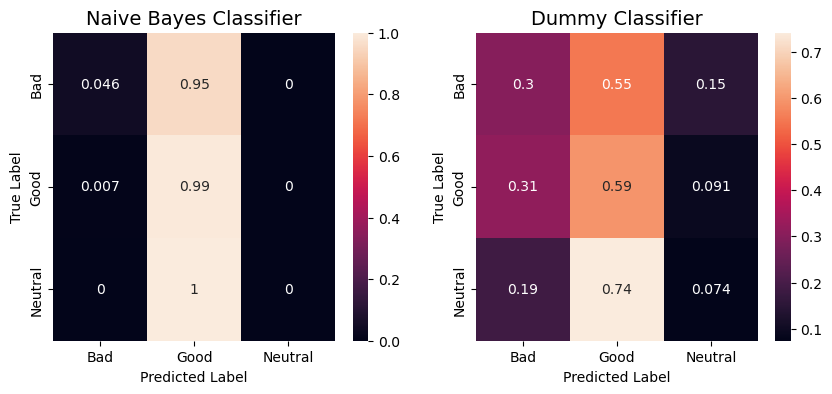

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (10, 4))
labels = y_train.sort_values().unique()

cm_nb    = confusion_matrix(y_test, preds_test)
cm_dummy = confusion_matrix(y_test, dummy.predict(X_test))

sns.heatmap(cm_nb / np.sum(cm_nb, axis =1).reshape((-1, 1)), ax = axes[0], annot = True)
sns.heatmap(cm_dummy / np.sum(cm_dummy, axis =1).reshape((-1, 1)), ax = axes[1], annot = True)

for ax in axes:
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    
axes[0].set_title("Naive Bayes Classifier", size = 14)
axes[1].set_title("Dummy Classifier", size = 14)

Efectivamente, el clasificador Naive Bayes clasificó casi todos los datos fuera de muestra como la clase mayoritaria, que es `Good`. Esto probablemente ya que al no tener las 'palabras únicas' en datos fuera de muestra como los de validación, el modelo se basa en otras variables que no fueron trascendentales para los datos de entrenamiento. Así, nuestro modelo es filosóficamente **peor** que un clasificador dummy.

## 1.3 Busqueda del Mejor Modelo con Grid Search [4 Puntos]

<p align="center">
  <img src="https://media1.tenor.com/images/70fdfeea52a8e2e4505498c230a0d2f9/tenor.gif?itemid=5134219" width="250">
</p>

No conformes con el rendimiento obtenido en la sección 1.2, el cuerpo docente les pide que realicen un **`HalvingGridSearchCV`** con diferentes parámetros para mejorar el rendimiento de la clasificación. Para esto, se le solicita que defina:

- Tres clasificadores distintos en donde varie sus parámetros. Considere usar modelos clásicos como también los basados en ensamblaje.
- Modificar `n-gram` range del `CountVectorizer` probando `(1,1), (1,2) y (1,3)`. Examinar también los otros parámetros de CountVectorizer como por ejemplo `max_df`, `min_df`, etc... ([Documentación aquí](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html))
- Seleccionar las columnas que contribuyen con la mayor información para la clasificación con `SelectPercentile` en los percentiles `[20, 40, 60, 80]` (puede usar la métrica que usted quiera).
- Reporte la mejor combinación encontrada y justifique por qué cree que es la mejor según el clasificador usado, la cantidad de columnas seleccionadas y los parámetros de CountVectorizer seleccionados por GridSearch.

A continuación, un ejemplo de parametros para GridSearch para una búsqueda de 3 clasificadores distintos:

```python
params = [
       # clasificador 1 + hiperparámetros
       {'clf': classificator1(),
        'clf__penalty': ['ovr'],
       # clasificador 1 + hiperparámetros    
       {'clf': classificator2(),
        'clf__n_estimators': [200]},
       # clasificador 1 + hiperparámetros
       {'clf': classificator3(),
        ...
       }
       ]
```

**Nota 1**: Puede ver los parámetros modificables aplicando el método get_params() sobre su pipeline. Ver la clase de GridSearch para mayor información sobre la sintáxis de las grillas.

**Nota 2**: Recuerde inicializar los clasificadores con un random state definido.

**Nota 3**: Puede usar en `HalvingGridSearchCV` el parámetro `verbose=10` para ver que GridSearch le indique el estado de su ejecución.

**Nota 3:** El GridSearch puede tomar tiempos de búsqueda exorbitantes, por lo que se le recomienda no agrandar mucho el espacio de búsqueda, dejar corriendo el código y tomarse un tecito.

**Respuesta:**

En un **primer approach**, se considerarán los siguientes 3 modelos de clasificación:
- RandomForest
- GradientBoostingClassifier
- SGDClassifier

Para cada uno de estos modelos se probarán distintos parámetros con la clase HalvingGridSearchCV, que nos permitirá encontrar el mejor modelo junto con los mejores parámetros.

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB

In [47]:
selection_pipeline = Pipeline(
    steps=[
        ("ColumnTransformer", ct),
        ("FeatureSelection",  SelectPercentile(f_classif, percentile = 90)),
        ("Model",        MultinomialNB())
    ]
)

selection_pipeline.get_params()

{'memory': None,
 'steps': [('ColumnTransformer',
   ColumnTransformer(transformers=[('MinMax', MinMaxScaler(),
                                    ['intelligence_score', 'strength_score',
                                     'speed_score', 'durability_score',
                                     'power_score', 'combat_score']),
                                   ('BagOfWords',
                                    CountVectorizer(ngram_range=(1, 2),
                                                    tokenizer=<__main__.StemmerTokenizer object at 0x00000237D2B5E910>),
                                    'history_text')])),
  ('FeatureSelection', SelectPercentile(percentile=90)),
  ('Model', MultinomialNB())],
 'verbose': False,
 'ColumnTransformer': ColumnTransformer(transformers=[('MinMax', MinMaxScaler(),
                                  ['intelligence_score', 'strength_score',
                                   'speed_score', 'durability_score',
                                   'p

Entrando en detalle en los parámetros:
- BagOfWords__ngram_range: Permite crear n-gramas de distintos rangos, en este caso de (1,1), (1,2) y (1,3).
- BagOfWords__max_df y min_df: Con estos parámetros es posible eliminar aquellos palabras que más y que menos se repiten dentro de un % de los documentos.
- BagOfWords__max_features: Genera un corpus con las n palabras más frecuentes.
- FeatureSelection__percentile: Selecciona aquellas columnas con mayor información en los percentiles definidos.
- Modelo: Los parámetros de los modelos van variando dependiendo de cuál es escogido.

In [29]:
np.random.seed(1991)

param_grid = [
    {
        'ColumnTransformer__BagOfWords__ngram_range': [(1,1),(1,2),(1,3)],
        'ColumnTransformer__BagOfWords__max_features': [10000, 25000],
        'FeatureSelection__percentile': [20, 40, 60, 80],
        'Model': [RandomForestClassifier(random_state=1)],
        'Model__criterion': ["gini", "entropy"],
        'Model__max_depth': [5, None]
    },
    {
        'ColumnTransformer__BagOfWords__ngram_range': [(1,1),(1,2),(1,3)],
        'ColumnTransformer__BagOfWords__max_features': [10000, 25000],
        'FeatureSelection__percentile': [20, 40, 60, 80],
        'Model': [GradientBoostingClassifier(random_state=1)],
        'Model__loss': ["log_loss", "deviance"],
        'Model__n_estimators': [100, 200],
        'Model__criterion': ["friedman_mse"]
    },
    {
        'ColumnTransformer__BagOfWords__ngram_range': [(1,1),(1,2),(1,3)],
        #'ColumnTransformer__BagOfWords__max_df': [0.2, 1],
        'ColumnTransformer__BagOfWords__max_features': [10000, 25000],
        'FeatureSelection__percentile': [20, 40, 60, 80],
        'Model': [SGDClassifier(random_state=1)],
        'Model__loss': ['hinge', 'log_loss'],
        'Model__penalty': ['elasticnet'],
        'Model__alpha': [0.001, 0.0001]
    },
]
param_grid

[{'ColumnTransformer__BagOfWords__ngram_range': [(1, 1), (1, 2), (1, 3)],
  'ColumnTransformer__BagOfWords__max_features': [10000, 25000],
  'FeatureSelection__percentile': [20, 40, 60, 80],
  'Model': [RandomForestClassifier(random_state=1)],
  'Model__criterion': ['gini', 'entropy'],
  'Model__max_depth': [5, None]},
 {'ColumnTransformer__BagOfWords__ngram_range': [(1, 1), (1, 2), (1, 3)],
  'ColumnTransformer__BagOfWords__max_features': [10000, 25000],
  'FeatureSelection__percentile': [20, 40, 60, 80],
  'Model': [GradientBoostingClassifier(random_state=1)],
  'Model__loss': ['log_loss', 'deviance'],
  'Model__n_estimators': [100, 200],
  'Model__criterion': ['friedman_mse']},
 {'ColumnTransformer__BagOfWords__ngram_range': [(1, 1), (1, 2), (1, 3)],
  'ColumnTransformer__BagOfWords__max_features': [10000, 25000],
  'FeatureSelection__percentile': [20, 40, 60, 80],
  'Model': [SGDClassifier(random_state=1)],
  'Model__loss': ['hinge', 'log_loss'],
  'Model__penalty': ['elasticnet'],

In [30]:
hgs = HalvingGridSearchCV(selection_pipeline, param_grid, scoring='f1_macro', cv=3, verbose=10)
hgs.fit(X_train,y_train)

n_iterations: 4
n_required_iterations: 6
n_possible_iterations: 4
min_resources_: 18
max_resources_: 1028
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 288
n_resources: 18
Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3; 1/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 1/3; 1/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 1/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_stat

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 1/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 1/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 1/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 2/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 2/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 2/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 2/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 2/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 2/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 3/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=2

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 3/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 3/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 3/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 3/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 3/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 4/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=2

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 4/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 4/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 4/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 4/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 4/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 5/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__per

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 5/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 5/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 5/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 5/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 5/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 6/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 6/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 6/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 6/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 6/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 6/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 7/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=4

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 7/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 7/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 7/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 7/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 7/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.762) total time=   0.1s
[CV 1/3; 8/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=4

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 8/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 8/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 8/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 8/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 8/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.762) total time=   0.1s
[CV 1/3; 9/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__per

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 9/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 9/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 9/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 9/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 9/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.286) total time=   0.1s
[CV 1/3; 10/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 10/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 10/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 10/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 10/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 10/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.286) total time=   0.1s
[CV 1/3; 11/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 11/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 11/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 11/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 11/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 11/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.286) total time=   0.1s
[CV 1/3; 12/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 12/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 12/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 12/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 12/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 12/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.286) total time=   0.1s
[CV 1/3; 13/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 13/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 13/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 13/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 13/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 13/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 14/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 14/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 14/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 14/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 14/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 14/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 15/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 15/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 15/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 15/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 15/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 15/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 16/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 16/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 16/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 16/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 16/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 16/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 17/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 17/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 17/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 17/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 17/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 17/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 18/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 18/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 18/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 18/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 18/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 18/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 19/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 19/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 19/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 19/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 19/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 19/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 20/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 20/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 20/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 20/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 20/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 20/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 21/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 21/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 21/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 21/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 21/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 21/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 22/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 22/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 22/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 22/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 22/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 22/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 23/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 23/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 23/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 23/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 23/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 23/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 24/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 24/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 24/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 24/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 24/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 24/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 25/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 25/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 25/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 25/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 25/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 25/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 26/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 26/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 26/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 26/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 26/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 26/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 27/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 27/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 27/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 27/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 27/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 27/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 28/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 28/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 28/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 28/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 28/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 28/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 29/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 29/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 29/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 29/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 29/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 29/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 30/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 30/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 30/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 30/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 30/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 30/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 31/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 31/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 31/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 31/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 31/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 31/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 32/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 32/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 32/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 32/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 32/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 32/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 33/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 33/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 33/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 33/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 33/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 33/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 34/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 34/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 34/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 34/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 34/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 34/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 35/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 35/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 35/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 35/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 35/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 35/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 36/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 36/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 36/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 36/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 36/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 36/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 37/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 37/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 37/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 37/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 37/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 37/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 38/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 38/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 38/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 38/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 38/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 38/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 39/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 39/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 39/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 39/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 39/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 39/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 40/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 40/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 40/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 40/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 40/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 40/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 41/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 41/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 41/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 41/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 41/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 41/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 42/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 42/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 42/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 42/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 42/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 42/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 43/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 43/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 43/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 43/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 43/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 43/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 44/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 44/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 44/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 44/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 44/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 44/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 45/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 45/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 45/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 45/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 45/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 45/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 46/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 46/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 46/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 46/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 46/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 46/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 47/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 47/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 47/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 47/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 47/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 47/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 48/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 48/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 48/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 48/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 48/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 48/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 49/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 49/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 49/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 49/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 49/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 49/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 50/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 50/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 50/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 50/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 50/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 50/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 51/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 51/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 51/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 51/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 51/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 51/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 52/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 52/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 52/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 52/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 52/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 52/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 53/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 53/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 53/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 53/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 53/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 53/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 54/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 54/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 54/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 54/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 54/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 54/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 55/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 55/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 55/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 55/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 55/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 55/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.762) total time=   0.1s
[CV 1/3; 56/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 56/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 56/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 56/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 56/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 56/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.762) total time=   0.1s
[CV 1/3; 57/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 57/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 57/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 57/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 57/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 57/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.286) total time=   0.1s
[CV 1/3; 58/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 58/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 58/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 58/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 58/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 58/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.286) total time=   0.1s
[CV 1/3; 59/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 59/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 59/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 59/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 59/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 59/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.286) total time=   0.1s
[CV 1/3; 60/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 60/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 60/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 60/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 60/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 60/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.286) total time=   0.1s
[CV 1/3; 61/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 61/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 61/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 61/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 61/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 61/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 62/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 62/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 62/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 62/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 62/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 62/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 63/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 63/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 63/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 63/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 63/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 63/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 64/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 64/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 64/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 64/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 64/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 64/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 65/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 65/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 65/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 65/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 65/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 65/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 66/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 66/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 66/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 66/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 66/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 66/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 67/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 67/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 67/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 67/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 67/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 67/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 68/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 68/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 68/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 68/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 68/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 68/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 69/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 69/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 69/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 69/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 69/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 69/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 70/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 70/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 70/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 70/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 70/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 70/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 71/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 71/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 71/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 71/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 71/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 71/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 72/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 72/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.3s
[CV 2/3; 72/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 72/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 72/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 72/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 73/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 73/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 73/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 73/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 73/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 73/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 74/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 74/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 74/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 74/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 74/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 74/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 75/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 75/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 75/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 75/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 75/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 75/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 76/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 76/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 76/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 76/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 76/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 76/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 77/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 77/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 77/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 77/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 77/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 77/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 78/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 78/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 78/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 78/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 78/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 78/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 79/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 79/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 79/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 79/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 79/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 79/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 80/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 80/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 80/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 80/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 80/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 80/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 81/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 81/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 81/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 81/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 81/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 81/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 82/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 82/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 82/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 82/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 82/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 82/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 83/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 83/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 83/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 83/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 83/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 83/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 84/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 84/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 84/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 84/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 84/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 84/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 85/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 85/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 85/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 85/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 85/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 85/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 86/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 86/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 86/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 86/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 86/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 86/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 87/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 87/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 87/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 87/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 87/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 87/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 88/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 88/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 88/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 88/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 88/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 88/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 89/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 89/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 89/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 89/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 89/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 89/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 90/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 90/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 90/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 90/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 90/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 90/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 91/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 91/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 91/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 91/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 91/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 91/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 92/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 92/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 92/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 92/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 92/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 92/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 93/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 93/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 93/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 93/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 93/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5
[CV 3/3; 93/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 94/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Mo

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 94/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 94/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 94/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 94/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None
[CV 3/3; 94/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=gini, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 95/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 95/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 95/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 95/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 95/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5
[CV 3/3; 95/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=5;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 96/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percenti

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 96/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.333) total time=   0.1s
[CV 2/3; 96/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 96/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 96/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 3/3; 96/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 97/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 97/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.1s
[CV 2/3; 97/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 97/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 97/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 97/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 98/288] START ColumnTransformer__B

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 98/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 98/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 98/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 98/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 98/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 99/288] START ColumnTransformer__B

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 99/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.1s
[CV 2/3; 99/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 99/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 99/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 99/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 100/288] START ColumnTransformer__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 100/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 100/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 100/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 100/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 100/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 101/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 101/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 101/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 101/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 101/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 101/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 102/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 102/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 102/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 102/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 102/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 102/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 103/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 103/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 103/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 103/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 103/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 103/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 104/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 104/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 104/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 104/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 104/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 104/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 105/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 105/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 105/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 105/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 105/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 105/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 106/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 106/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 106/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 106/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 106/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 106/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 107/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 107/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 107/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 107/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 107/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 107/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 108/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 108/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 108/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 108/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 108/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 108/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 109/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 109/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 109/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 109/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 109/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 109/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 110/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 110/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 110/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 110/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 110/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 110/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 111/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 111/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 111/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 111/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 111/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 111/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 112/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 112/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 112/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 112/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 112/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 112/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 113/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 113/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 113/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 113/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 113/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 113/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 114/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 114/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 114/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 114/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 114/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 114/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 115/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 115/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 115/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 115/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 115/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 115/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 116/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 116/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 116/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 116/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 116/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 116/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 117/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 117/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 117/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 117/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 117/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 117/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 118/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 118/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 118/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 118/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 118/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 118/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 119/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 119/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 119/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 119/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 119/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 119/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 120/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 120/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 120/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 120/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 120/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 120/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 121/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 121/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 121/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 121/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 121/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 121/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 122/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 122/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 122/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 122/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 122/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 122/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 123/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 123/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 123/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 123/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 123/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 123/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 124/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 124/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 124/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 124/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 124/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 124/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 125/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 125/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 125/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 125/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 125/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 125/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 126/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 126/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 126/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 126/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 126/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 126/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 127/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 127/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 127/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 127/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 127/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 127/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 128/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 128/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 128/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 128/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 128/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 128/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 129/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 129/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 129/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 129/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 129/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 129/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 130/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 130/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 130/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 130/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 130/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 130/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 131/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 131/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 131/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 131/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 131/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 131/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 132/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 132/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 132/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 132/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 132/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 132/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 133/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 133/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 133/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 133/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 133/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 133/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 134/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 134/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 134/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 134/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 134/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 134/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 135/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 135/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 135/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 135/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 135/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 135/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 136/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 136/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 136/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 136/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 136/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 136/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 137/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 137/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 137/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 137/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 137/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 137/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 138/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 138/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.4s
[CV 2/3; 138/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 138/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 138/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 138/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 139/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 139/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 139/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 139/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 139/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 139/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 140/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 140/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 140/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 140/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 140/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 140/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 141/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 141/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 141/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 141/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 141/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 141/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 142/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 142/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.4s
[CV 2/3; 142/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 142/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 142/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 142/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 143/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 143/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 143/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 143/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 143/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 143/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 144/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 144/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.4s
[CV 2/3; 144/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 144/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 144/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 144/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 145/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 145/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.1s
[CV 2/3; 145/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 145/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 145/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 145/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 146/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 146/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 146/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 146/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 146/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 146/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 147/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 147/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.1s
[CV 2/3; 147/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 147/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 147/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 147/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 148/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 148/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 148/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 148/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 148/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 148/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 149/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 149/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 149/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 149/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 149/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 149/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 150/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 150/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 150/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 150/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 150/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 150/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 151/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 151/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 151/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 151/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 151/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 151/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 152/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 152/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 152/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 152/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 152/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 152/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 153/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 153/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 153/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 153/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 153/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 153/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 154/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 154/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 154/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 154/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 154/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 154/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 155/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 155/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 155/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 155/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 155/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 155/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 156/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 156/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 156/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 156/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 156/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 156/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 157/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 157/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 157/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 157/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 157/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 157/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 158/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 158/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 158/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 158/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 158/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 158/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 159/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 159/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 159/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 159/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 159/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 159/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 160/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 160/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 160/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 160/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 160/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 160/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 161/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 161/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 161/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 161/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 161/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 161/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 162/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 162/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 162/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 162/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 162/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 162/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 163/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 163/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 163/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 163/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 163/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 163/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 164/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 164/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 164/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 164/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 164/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 164/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 165/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 165/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 165/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 165/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 165/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 165/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 166/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 166/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 166/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 166/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.5s
[CV 3/3; 166/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 166/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 167/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 167/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 167/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 167/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 167/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 167/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 168/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 168/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 168/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 168/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 168/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 168/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 169/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 169/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 169/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 169/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 169/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 169/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 170/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 170/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 170/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 170/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 170/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 170/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 171/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 171/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 171/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 171/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 171/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 171/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 172/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 172/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 172/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 172/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 172/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 172/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 173/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 173/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 173/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 173/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 173/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 173/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 174/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 174/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 174/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 174/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.5s
[CV 3/3; 174/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 174/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 175/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 175/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 175/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 175/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 175/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 175/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 176/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 176/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 176/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 176/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.5s
[CV 3/3; 176/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 176/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 177/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 177/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 177/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 177/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 177/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 177/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 178/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 178/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 178/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 178/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 178/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 178/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 179/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'devi

[CV 2/3; 179/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 179/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 179/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 180/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 180/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 180/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 180/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 180/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200
[CV 3/3; 180/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 181/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 181/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 181/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 181/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 181/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 181/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 182/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 182/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 182/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 182/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.5s
[CV 3/3; 182/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 182/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 183/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 183/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.2s
[CV 2/3; 183/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 183/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 183/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 183/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 184/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 184/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 184/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 184/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.5s
[CV 3/3; 184/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 184/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 185/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 185/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 185/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 185/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 185/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 185/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 186/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 186/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.4s
[CV 2/3; 186/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 186/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.5s
[CV 3/3; 186/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 186/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 187/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 187/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 187/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 187/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 187/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100
[CV 3/3; 187/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 188/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 188/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.4s
[CV 2/3; 188/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 188/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.5s
[CV 3/3; 188/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 188/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 189/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 189/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 189/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 189/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.5s
[CV 3/3; 189/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 3/3; 189/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 190/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 190/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.4s
[CV 2/3; 190/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 190/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.6s
[CV 3/3; 190/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 3/3; 190/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 191/288] START ColumnTransforme

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 191/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   0.3s
[CV 2/3; 191/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 191/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.167) total time=   0.5s
[CV 3/3; 191/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 191/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 192/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 192/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.250) total time=   0.4s
[CV 2/3; 192/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 192/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.167) total time=   0.6s
[CV 3/3; 192/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 192/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.583) total time=   0.2s
[CV 1/3; 193/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 1/3; 193/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 193/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransform

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 193/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 193/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 193/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 194/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 194/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 194/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 194/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 194/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 194/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 195/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 195/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 195/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 195/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 195/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 195/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 196/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 196/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 196/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 196/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 196/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 196/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.762) total time=   0.1s
[CV 1/3; 197/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 197/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.250) total time=   0.1s
[CV 2/3; 197/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 197/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 197/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 197/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 198/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 198/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.486) total time=   0.1s
[CV 2/3; 198/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 198/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 198/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 198/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 199/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 199/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.250) total time=   0.1s
[CV 2/3; 199/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 199/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 199/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 199/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 200/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 200/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.486) total time=   0.1s
[CV 2/3; 200/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 200/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 200/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 200/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 201/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 201/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 201/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 201/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 201/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 201/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 202/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 202/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 202/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 202/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 202/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 202/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 203/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 203/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 203/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 203/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 203/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 203/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 204/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 204/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 204/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 204/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 204/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 204/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 205/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 205/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 205/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 205/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 205/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 205/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 206/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 206/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 206/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 206/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 206/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 206/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 207/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 207/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 207/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 207/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 207/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 207/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 208/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 208/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 208/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 208/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 208/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 208/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 209/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 209/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 209/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 209/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 209/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 209/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 210/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 210/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 210/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 210/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 210/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 210/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 211/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 211/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 211/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 211/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 211/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 211/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 212/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 212/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 212/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 212/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 212/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 212/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 213/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 213/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 213/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 213/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 213/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 213/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 214/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 214/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.133) total time=   0.1s
[CV 2/3; 214/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 214/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 214/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 214/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 215/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 215/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 215/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 215/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 215/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 215/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 216/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 216/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.133) total time=   0.1s
[CV 2/3; 216/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 216/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 216/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 216/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 217/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 217/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 217/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 217/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 217/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 217/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 218/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 218/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 218/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 218/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 218/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 218/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 219/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 219/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 219/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 219/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 219/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 219/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 220/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 220/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 220/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 220/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 220/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 220/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 221/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 221/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 221/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 221/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 221/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 221/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 222/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 222/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 222/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 222/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 222/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 222/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 223/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 223/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 223/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 223/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 223/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 223/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 224/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 224/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 224/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 224/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 224/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 224/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 225/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 225/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 225/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 225/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 225/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 225/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 226/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 226/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 226/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 226/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 226/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 226/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 227/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 227/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 227/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 227/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 227/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 227/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 228/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 228/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 228/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 228/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 228/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 228/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 229/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 229/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 229/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 229/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 229/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 229/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 230/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 230/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.133) total time=   0.1s
[CV 2/3; 230/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 230/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 230/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 230/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 231/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 231/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 231/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 231/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 231/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 231/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 232/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 232/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.133) total time=   0.1s
[CV 2/3; 232/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 232/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 232/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 232/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 233/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 233/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 233/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 233/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 233/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 233/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 234/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 234/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 234/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 234/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 234/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 234/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 235/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 235/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 235/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 235/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 235/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 235/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 236/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 236/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 236/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 236/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 236/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 236/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 237/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 237/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 237/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 237/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 237/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 237/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 238/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 238/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 238/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 238/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 238/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 238/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 239/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 239/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 239/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 239/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 239/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 239/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 240/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 240/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 240/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 240/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 240/288] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 240/288] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 241/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 241/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 241/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 241/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 241/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 241/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 242/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 242/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 242/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 242/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 242/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 242/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.583) total time=   0.1s
[CV 1/3; 243/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 243/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 243/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 243/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 243/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 243/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 244/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 244/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 244/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 244/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 244/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 244/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.762) total time=   0.1s
[CV 1/3; 245/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 245/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.250) total time=   0.1s
[CV 2/3; 245/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 245/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 245/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 245/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 246/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 246/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.486) total time=   0.1s
[CV 2/3; 246/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 246/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 246/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 246/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 247/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 247/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.250) total time=   0.1s
[CV 2/3; 247/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 247/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 247/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 247/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 248/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 248/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.486) total time=   0.1s
[CV 2/3; 248/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 248/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 248/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 248/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 249/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 249/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 249/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 249/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 249/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 249/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 250/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 250/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 250/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 250/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 250/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 250/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 251/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 251/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 251/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 251/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 251/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 251/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 252/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 252/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 252/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 252/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 252/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 252/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 253/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 253/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 253/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 253/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 253/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 253/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 254/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 254/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 254/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 254/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 254/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 254/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 255/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 255/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 255/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 255/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 255/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 255/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 256/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 256/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 256/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 256/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 256/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 256/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 257/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 257/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 257/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 257/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 257/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 257/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 258/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 258/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 258/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 258/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 258/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 258/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 259/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 259/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 259/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 259/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 259/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 259/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 260/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 260/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 260/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 260/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 260/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 260/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 261/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 261/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 261/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 261/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 261/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 261/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 262/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 262/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.133) total time=   0.1s
[CV 2/3; 262/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 262/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 262/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 262/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 263/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 263/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 263/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 263/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 263/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 263/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 264/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 264/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.133) total time=   0.1s
[CV 2/3; 264/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 264/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 264/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 264/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 265/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 265/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 265/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 265/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 265/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 265/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 266/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 266/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 266/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 266/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 266/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 266/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 267/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 267/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 267/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 267/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 267/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 267/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 268/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 268/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 268/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 268/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 268/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 268/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 269/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 269/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 269/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 269/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 269/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 269/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 270/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 270/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 270/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 270/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 270/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 270/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 271/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 271/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 271/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 271/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 271/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 271/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 272/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 272/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 272/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 272/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 272/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 272/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 273/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 273/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 273/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 273/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 273/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 273/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 274/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 274/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 274/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 274/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 274/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 274/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 275/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 275/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 275/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 275/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 275/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 275/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 276/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 276/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/3; 276/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 276/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 276/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 276/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 277/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 277/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 277/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 277/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 277/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 277/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 278/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 278/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.133) total time=   0.1s
[CV 2/3; 278/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 278/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 278/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 278/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 279/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 279/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 279/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 279/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 279/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 279/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 280/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 280/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.133) total time=   0.1s
[CV 2/3; 280/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 280/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 280/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 280/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 281/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 281/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 281/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 281/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 281/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 281/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 282/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 282/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 282/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 282/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 282/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 282/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 283/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 283/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 283/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 283/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 283/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 283/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 284/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 284/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.244) total time=   0.1s
[CV 2/3; 284/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 284/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 284/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 284/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 285/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 285/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 285/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 285/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 285/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 285/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 286/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_ran

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 286/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 286/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 286/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 286/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 286/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 287/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 287/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.095) total time=   0.1s
[CV 2/3; 287/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 287/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.3s
[CV 3/3; 287/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet
[CV 3/3; 287/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=hinge, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
[CV 1/3; 288/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 1/3; 288/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.111) total time=   0.1s
[CV 2/3; 288/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[CV 2/3; 288/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.167) total time=   0.4s
[CV 3/3; 288/288] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 3/3; 288/288] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=SGDClassifier(random_state=1), Model__alpha=0.0001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.444) total time=   0.1s
----------
iter: 1
n_candidates: 96
n_resources: 54
Fitting 3 folds for each of 96 candidates, totallin

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 3/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.174) total time=   0.7s
[CV 2/3; 3/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 3/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.343) total time=   0.7s
[CV 3/3; 3/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 3/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.286) total time=   0.6s
[CV 1/3; 4/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 4/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   0.9s
[CV 2/3; 4/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 4/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.343) total time=   0.9s
[CV 3/3; 4/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 4/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.286) total time=   0.9s
[CV 1/3; 5/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 5/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.345) total time=   0.9s
[CV 2/3; 5/96] START ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 7/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.345) total time=   0.9s
[CV 2/3; 7/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 7/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.376) total time=   0.8s
[CV 3/3; 7/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 7/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.463) total time=   0.8s
[CV 1/3; 8/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 8/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   1.3s
[CV 2/3; 8/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 8/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.343) total time=   1.1s
[CV 3/3; 8/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 8/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.286) total time=   1.2s
[CV 1/3; 9/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 9/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.324) total time=   1.1s
[CV 2/3; 9/96] START ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 11/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.324) total time=   1.0s
[CV 2/3; 11/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 11/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.261) total time=   1.0s
[CV 3/3; 11/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 11/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.240) total time=   0.9s
[CV 1/3; 12/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 12/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   2.0s
[CV 2/3; 12/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 12/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.343) total time=   1.9s
[CV 3/3; 12/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 12/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.286) total time=   1.7s
[CV 1/3; 13/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 13/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.277) total time=   1.0s
[CV 2/3; 13/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 15/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   1.3s
[CV 2/3; 15/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 15/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.343) total time=   1.1s
[CV 3/3; 15/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 15/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.286) total time=   1.1s
[CV 1/3; 16/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 1/3; 16/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   1.3s
[CV 2/3; 16/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 17/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.317) total time=   0.6s
[CV 2/3; 17/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 17/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.303) total time=   0.5s
[CV 3/3; 17/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 17/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.267) total time=   0.5s
[CV 1/3; 18/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 18/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.213) total time=   0.7s
[CV 2/3; 18/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 18/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.278) total time=   0.7s
[CV 3/3; 18/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 18/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.267) total time=   0.6s
[CV 1/3; 19/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 19/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.442) total time=   0.7s
[CV 2/3; 19/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 21/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.442) total time=   0.7s
[CV 2/3; 21/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 21/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.404) total time=   0.6s
[CV 3/3; 21/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 21/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.593) total time=   0.5s
[CV 1/3; 22/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 22/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.317) total time=   0.9s
[CV 2/3; 22/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 22/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.404) total time=   0.8s
[CV 3/3; 22/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 22/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.404) total time=   0.7s
[CV 1/3; 23/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 23/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.417) total time=   0.7s
[CV 2/3; 23/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 25/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.417) total time=   0.8s
[CV 2/3; 25/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 25/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.248) total time=   0.7s
[CV 3/3; 25/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 25/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.232) total time=   0.6s
[CV 1/3; 26/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 26/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.399) total time=   1.0s
[CV 2/3; 26/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 26/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.242) total time=   1.0s
[CV 3/3; 26/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 26/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.203) total time=   0.8s
[CV 1/3; 27/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 27/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.483) total time=   0.8s
[CV 2/3; 27/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 29/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.483) total time=   0.8s
[CV 2/3; 29/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 29/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.302) total time=   0.7s
[CV 3/3; 29/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 29/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.203) total time=   0.6s
[CV 1/3; 30/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 30/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.335) total time=   1.1s
[CV 2/3; 30/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 30/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.242) total time=   1.1s
[CV 3/3; 30/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 30/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.203) total time=   0.9s
[CV 1/3; 31/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 31/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.174) total time=   0.7s
[CV 2/3; 31/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 33/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.174) total time=   0.7s
[CV 2/3; 33/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 33/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.293) total time=   0.6s
[CV 3/3; 33/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 33/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.463) total time=   0.6s
[CV 1/3; 34/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 34/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   0.9s
[CV 2/3; 34/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 34/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.343) total time=   0.9s
[CV 3/3; 34/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 34/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.463) total time=   0.8s
[CV 1/3; 35/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 35/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.345) total time=   0.9s
[CV 2/3; 35/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 36/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.345) total time=   0.9s
[CV 2/3; 36/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 36/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.376) total time=   0.8s
[CV 3/3; 36/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 36/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.286) total time=   0.7s
[CV 1/3; 37/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 1/3; 37/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   1.9s
[CV 2/3; 37/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 38/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   1.6s
[CV 2/3; 38/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 38/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.261) total time=   1.7s
[CV 3/3; 38/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 38/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.256) total time=   1.4s
[CV 1/3; 39/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 39/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   1.0s
[CV 2/3; 39/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 39/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.343) total time=   1.0s
[CV 3/3; 39/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 39/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.286) total time=   0.9s
[CV 1/3; 40/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 1/3; 40/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   1.0s
[CV 2/3; 40/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 41/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.174) total time=   0.8s
[CV 2/3; 41/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 41/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.323) total time=   0.7s
[CV 3/3; 41/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 41/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.286) total time=   0.6s
[CV 1/3; 42/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 42/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.256) total time=   1.1s
[CV 2/3; 42/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 44/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.256) total time=   1.1s
[CV 2/3; 44/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 44/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.343) total time=   0.9s
[CV 3/3; 44/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 44/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.373) total time=   0.8s
[CV 1/3; 45/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 45/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   1.6s
[CV 2/3; 45/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 45/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.343) total time=   1.4s
[CV 3/3; 45/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 45/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.378) total time=   1.2s
[CV 1/3; 46/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 46/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.324) total time=   1.3s
[CV 2/3; 46/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 48/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.324) total time=   1.3s
[CV 2/3; 48/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 48/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.261) total time=   1.2s
[CV 3/3; 48/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 48/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.240) total time=   0.9s
[CV 1/3; 49/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 49/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.174) total time=   0.8s
[CV 2/3; 49/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 50/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   2.0s
[CV 2/3; 50/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 50/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.261) total time=   2.0s
[CV 3/3; 50/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 50/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.256) total time=   1.5s
[CV 1/3; 51/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 1/3; 51/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   2.4s
[CV 2/3; 51/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 52/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.324) total time=   1.5s
[CV 2/3; 52/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 52/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.261) total time=   1.4s
[CV 3/3; 52/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 52/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.250) total time=   1.1s
[CV 1/3; 53/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 53/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   2.3s
[CV 2/3; 53/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 53/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.261) total time=   2.2s
[CV 3/3; 53/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 53/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.222) total time=   1.7s
[CV 1/3; 54/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 54/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.174) total time=   0.9s
[CV 2/3; 54/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 56/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.174) total time=   0.9s
[CV 2/3; 56/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 56/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.343) total time=   0.8s
[CV 3/3; 56/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 56/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.286) total time=   0.9s
[CV 1/3; 57/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 57/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   1.6s
[CV 2/3; 57/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 57/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.343) total time=   1.2s
[CV 3/3; 57/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 57/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.286) total time=   1.4s
[CV 1/3; 58/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 58/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.256) total time=   1.3s
[CV 2/3; 58/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 61/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.335) total time=   1.1s
[CV 2/3; 61/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 61/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.242) total time=   1.0s
[CV 3/3; 61/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 61/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.203) total time=   0.8s
[CV 1/3; 62/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 62/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.174) total time=   1.8s
[CV 2/3; 62/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 62/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.261) total time=   1.9s
[CV 3/3; 62/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 62/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.231) total time=   1.6s
[CV 1/3; 63/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 1/3; 63/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.335) total time=   1.1s
[CV 2/3; 63/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 64/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.345) total time=   1.2s
[CV 2/3; 64/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 64/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.235) total time=   1.1s
[CV 3/3; 64/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 64/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.240) total time=   1.0s
[CV 1/3; 65/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 65/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.317) total time=   0.6s
[CV 2/3; 65/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 67/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.317) total time=   0.6s
[CV 2/3; 67/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 67/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.303) total time=   0.5s
[CV 3/3; 67/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 67/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.267) total time=   0.5s
[CV 1/3; 68/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 68/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.213) total time=   0.7s
[CV 2/3; 68/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 68/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.278) total time=   0.6s
[CV 3/3; 68/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 68/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.267) total time=   0.6s
[CV 1/3; 69/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 69/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.483) total time=   0.8s
[CV 2/3; 69/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 69/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.302) total time=   0.7s
[CV 3/3; 69/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 69/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.203) total time=   0.6s
[CV 1/3; 70/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 1/3; 70/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.317) total time=   0.9s
[CV 2/3; 70/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 71/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.442) total time=   0.7s
[CV 2/3; 71/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 71/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.404) total time=   0.6s
[CV 3/3; 71/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 71/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.593) total time=   0.5s
[CV 1/3; 72/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 72/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.442) total time=   0.7s
[CV 2/3; 72/96] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 76/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.417) total time=   0.7s
[CV 2/3; 76/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 76/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.248) total time=   0.7s
[CV 3/3; 76/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 76/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.232) total time=   0.5s
[CV 1/3; 77/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 77/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.399) total time=   1.0s
[CV 2/3; 77/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 77/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.242) total time=   1.0s
[CV 3/3; 77/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 77/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.203) total time=   0.8s
[CV 1/3; 78/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 78/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.317) total time=   0.9s
[CV 2/3; 78/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 78/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.404) total time=   0.8s
[CV 3/3; 78/96] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 78/96] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.404) total time=   0.7s
[CV 1/3; 79/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None
[CV 1/3; 79/96] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=RandomForestClassifier(random_state=1), Model__criterion=entropy, Model__max_depth=None;, score=(train=1.000, test=0.342) total time=   0.5s
[CV 2/3; 79/96] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_ra

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 2/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.451) total time=   1.6s
[CV 2/3; 2/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 2/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.320) total time=   2.1s
[CV 3/3; 2/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 2/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.272) total time=   1.6s
[CV 1/3; 3/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 3/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.451) total time=   1.6s
[CV 2/3; 3/32] START ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 4/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.451) total time=   1.6s
[CV 2/3; 4/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 4/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.320) total time=   2.1s
[CV 3/3; 4/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 4/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.272) total time=   1.6s
[CV 1/3; 5/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 5/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.343) total time=   1.5s
[CV 2/3; 5/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 5/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.291) total time=   2.0s
[CV 3/3; 5/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 5/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.993, test=0.258) total time=   1.5s
[CV 1/3; 6/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 6/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.343) total time=   1.5s
[CV 2/3; 6/32] START ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 10/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.336) total time=   2.1s
[CV 2/3; 10/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 10/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.330) total time=   2.7s
[CV 3/3; 10/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 10/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.265) total time=   2.1s
[CV 1/3; 11/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 1/3; 11/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.343) total time=   1.8s
[CV 2/3; 11/32] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 12/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.343) total time=   1.8s
[CV 2/3; 12/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 12/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.276) total time=   2.3s
[CV 3/3; 12/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 12/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=20, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.265) total time=   1.8s
[CV 1/3; 13/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 13/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.485) total time=   1.7s
[CV 2/3; 13/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 13/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.311) total time=   2.2s
[CV 3/3; 13/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 13/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.272) total time=   1.7s
[CV 1/3; 14/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 14/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.485) total time=   1.7s
[CV 2/3; 14/32] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 16/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.485) total time=   1.7s
[CV 2/3; 16/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 16/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.311) total time=   2.2s
[CV 3/3; 16/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 16/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.272) total time=   1.7s
[CV 1/3; 17/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 17/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.320) total time=   1.7s
[CV 2/3; 17/32] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 18/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.320) total time=   1.7s
[CV 2/3; 18/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 18/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.291) total time=   2.1s
[CV 3/3; 18/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 18/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 2), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.272) total time=   1.8s
[CV 1/3; 19/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 19/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.451) total time=   1.8s
[CV 2/3; 19/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 19/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.284) total time=   2.3s
[CV 3/3; 19/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 19/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.279) total time=   1.8s
[CV 1/3; 20/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200
[CV 1/3; 20/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=200;, score=(train=1.000, test=0.451) total time=   1.8s
[CV 2/3; 20/32] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 22/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.451) total time=   1.8s
[CV 2/3; 22/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 22/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.284) total time=   2.3s
[CV 3/3; 22/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 22/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=200;, score=(train=1.000, test=0.279) total time=   1.8s
[CV 1/3; 23/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 1/3; 23/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.383) total time=   1.1s
[CV 2/3; 23/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 27/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.326) total time=   1.8s
[CV 2/3; 27/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 27/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.293) total time=   2.3s
[CV 3/3; 27/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 27/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.272) total time=   1.8s
[CV 1/3; 28/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 28/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 3), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=1.000, test=0.326) total time=   1.8s
[CV 2/3; 28/32] START ColumnTransformer__BagOf

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 31/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.451) total time=   1.5s
[CV 2/3; 31/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 31/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.284) total time=   2.0s
[CV 3/3; 31/32] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 31/32] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.993, test=0.272) total time=   1.5s
[CV 1/3; 32/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 32/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.451) total time=   1.5s
[CV 2/3; 32/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 32/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=1.000, test=0.284) total time=   1.9s
[CV 3/3; 32/32] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 32/32] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.993, test=0.272) total time=   1.5s
----------
iter: 3
n_candidates: 11
n_resources: 486
Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV 1/3; 1/11] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 1/11] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.985, test=0.387) total time=   5.2s
[CV 2/3; 1/11] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 1/11] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.998, test=0.371) total time=   4.9s
[CV 3/3; 1/11] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 1/11] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=60, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.995, test=0.400) total time=   5.2s
[CV 1/3; 2/11] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 2/11] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=0.985, test=0.375) total time=   5.4s
[CV 2/3; 2/11] START ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 3/11] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.988, test=0.359) total time=   5.8s
[CV 2/3; 3/11] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 3/11] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.998, test=0.365) total time=   5.2s
[CV 3/3; 3/11] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 3/11] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.995, test=0.357) total time=   5.7s
[CV 1/3; 4/11] START ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100
[CV 1/3; 4/11] END ColumnTransformer__BagOfWords__max_features=25000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=log_loss, Model__n_estimators=100;, score=(train=0.988, test=0.359) total time=   5.6s
[CV 2/3; 4/11] START ColumnTransformer__BagOfWord

/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 1/3; 5/11] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.985, test=0.375) total time=   5.4s
[CV 2/3; 5/11] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 2/3; 5/11] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.998, test=0.395) total time=   5.2s
[CV 3/3; 5/11] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100


/home/chr/tmp/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


[CV 3/3; 5/11] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=80, Model=GradientBoostingClassifier(random_state=1), Model__criterion=friedman_mse, Model__loss=deviance, Model__n_estimators=100;, score=(train=0.993, test=0.378) total time=   5.5s
[CV 1/3; 6/11] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet
[CV 1/3; 6/11] END ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__BagOfWords__ngram_range=(1, 1), FeatureSelection__percentile=40, Model=SGDClassifier(random_state=1), Model__alpha=0.001, Model__loss=log_loss, Model__penalty=elasticnet;, score=(train=1.000, test=0.473) total time=   3.8s
[CV 2/3; 6/11] START ColumnTransformer__BagOfWords__max_features=10000, ColumnTransformer__Ba

HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('ColumnTransformer',
                                               ColumnTransformer(transformers=[('MinMax',
                                                                                MinMaxScaler(),
                                                                                ['intelligence_score',
                                                                                 'strength_score',
                                                                                 'speed_score',
                                                                                 'durability_score',
                                                                                 'power_score',
                                                                                 'combat_score']),
                                                                               ('BagOfWords',
                                                                                CountVectorizer(ngram_range=(1,
                                                                                                             2),
                                                                                                tokenizer=<__main__.StemmerTokenizer object at 0x7f042e911930>),
                                                                                'history_...
                                {'ColumnTransformer__BagOfWords__max_features': [10000,
                                                                                 25000],
                                 'ColumnTransformer__BagOfWords__ngram_range': [(1,
                                                                                 1),
                                                                                (1,
                                                                                 2),
                                                                                (1,
                                                                                 3)],
                                 'FeatureSelection__percentile': [20, 40, 60,
                                                                  80],
                                 'Model': [SGDClassifier(alpha=0.001,
                                                         loss='log_loss',
                                                         penalty='elasticnet',
                                                         random_state=1)],
                                 'Model__alpha': [0.001, 0.0001],
                                 'Model__loss': ['hinge', 'log_loss'],
                                 'Model__penalty': ['elasticnet']}],
                    scoring='f1_macro', verbose=10)

In [66]:
hgs.best_params_

{'ColumnTransformer__BagOfWords__max_features': 25000,
 'ColumnTransformer__BagOfWords__ngram_range': (1, 1),
 'FeatureSelection__percentile': 40,
 'Model': SGDClassifier(alpha=0.001, penalty='elasticnet', random_state=1),
 'Model__alpha': 0.001,
 'Model__loss': 'log_loss',
 'Model__penalty': 'elasticnet'}

In [32]:
y_pred = hgs.predict(X_test)

In [33]:
print("Matriz de confusión: \n")
print(confusion_matrix(y_test, y_pred, labels=hgs.classes_))

Matriz de confusión: 

[[ 47  35   5]
 [ 26 110   7]
 [  9  17   1]]


In [34]:
print("\nReporte de Clasificación: \n")
print(classification_report(y_test, y_pred, target_names=hgs.classes_))


Reporte de Clasificación: 

              precision    recall  f1-score   support

         Bad       0.57      0.54      0.56        87
        Good       0.68      0.77      0.72       143
     Neutral       0.08      0.04      0.05        27

    accuracy                           0.61       257
   macro avg       0.44      0.45      0.44       257
weighted avg       0.58      0.61      0.59       257



Como vemos, el mejor modelo entrenado es el `SGDClassifier`, cuyos mejores parámetros fueron:
- Loss: log_loss
- Penalty: elasticnet

Es interesante resaltar que las columnas seleccionadas se encuentran en el percentil 40 de los mejores atributos para clasificar según anova luego de seleccionar las 25000 palabras más frecuentes, y que el CountVectorizaer seleccionado fue de (1,1)(unigramas), es decir, se obtuvieron los mejores resultados utilizando sólo las palabras y no una concatenación de éstas para formar pequeñas frases (bi-grama/tri-grama). El selector de atributos (`SelectPercentile`) sólo descartaba el 10% en el modelo `MultinomialNB`.

Al ver resultados entregados por HalvingGridSearchCV, notamos que son mejores que los anteriores modelos entrenados, pero aún así no son del todo prometedores. Si bien el f1-score "macro avg" es mayor que el modelo "dummy" y "MultinomialNB()", el accuracy es practicamente el mismo que el entregado por el modelo `MultinomialNB`. Además, si vemos la matriz de confusión, el modelo suele confundir la clase `Nuetral` con `Good` para la mayoría de datos testeados.

Es por ello que en un **segundo approach** nos planteamos realizar un segundo gridsearch utilizando `TfidfTransformer` para, en lugar de utilizar las ocurrencias brutas de un token, aplicar transformaciones que nos ayudan a reducir el impacto de aquellos tokens que ocurren con mucha frecuencia y que, por esta misma razón, entregan menos información. Vemos que el modelo que mejor resultado entregó fue `RandomForest` con:
- criterion: gini
- max_depth: None

En este caso cargamos el modelo desde un `pkl`, debido a que se entrenó de forma paralela para evitar tomarnos más de un tecito al entrenar. Obtenemos las predicciones y la matriz de confusión y comparamos con lo obtenido en el primer approach.

In [28]:
import pickle
import warnings
warnings.filterwarnings("ignore")

with open('model_tfid.pkl', 'rb') as file:
    model_tfid = pickle.load(file)

In [32]:
model_tfid.best_params_

{'ColumnTransformer__BagOfWords__max_df': 0.2,
 'ColumnTransformer__BagOfWords__max_features': 10000,
 'ColumnTransformer__BagOfWords__ngram_range': (1, 1),
 'FeatureSelection__percentile': 40,
 'Model': RandomForestClassifier(max_features='sqrt', random_state=1),
 'Model__criterion': 'gini',
 'Model__max_depth': None}

In [37]:
y_pred_tfid = model_tfid.predict(X_test)

In [38]:
print("Matriz de confusión RandomForest: \n")
print(confusion_matrix(y_test, y_pred_tfid, labels=model_tfid.classes_))

Matriz de confusión RandomForest: 

[[ 21  65   1]
 [  9 134   0]
 [  1  25   1]]


In [39]:
print("\nReporte de Clasificación RandomForest: \n")
print(classification_report(y_test, y_pred_tfid, target_names=model_tfid.classes_))


Reporte de Clasificación RandomForest: 

              precision    recall  f1-score   support

         Bad       0.68      0.24      0.36        87
        Good       0.60      0.94      0.73       143
     Neutral       0.50      0.04      0.07        27

    accuracy                           0.61       257
   macro avg       0.59      0.41      0.39       257
weighted avg       0.61      0.61      0.53       257



Text(0.5, 1.0, 'RandomForest Classifier')

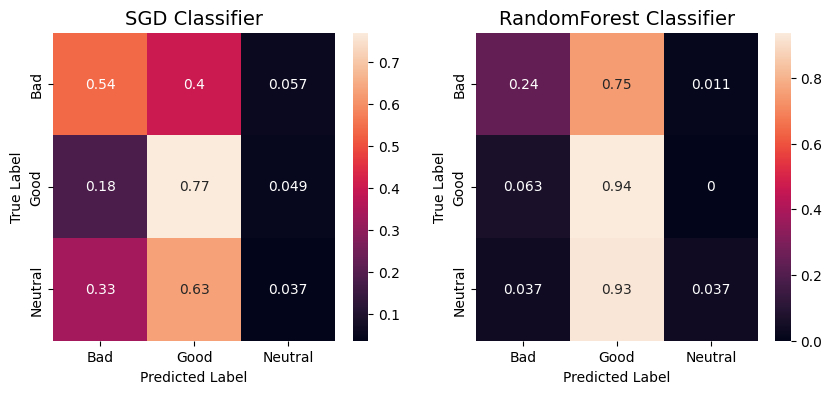

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
labels = y_train.sort_values().unique()

cm_nb    = confusion_matrix(y_test, y_pred)
cm_tfid = confusion_matrix(y_test, y_pred_tfid)

sns.heatmap(cm_nb / np.sum(cm_nb, axis =1).reshape((-1, 1)), ax = axes[0], annot = True)
sns.heatmap(cm_tfid / np.sum(cm_tfid, axis =1).reshape((-1, 1)), ax = axes[1], annot = True)

for ax in axes:
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    
axes[0].set_title("SGD Classifier", size = 14)
axes[1].set_title("RandomForest Classifier", size = 14)

Al igual que en el primer approach, las columnas seleccionadas se encuentran en el percentil 40 según annova y el CountVectorizaer seleccionado fue nuevamente de (1,1)(unigramas), pero sólo se utilizaron las 10000 palabras más frecuentes. Esta concordancia en los unigramas indicaría que es suficiente con el uso de palabras por sí solas. Aún así, vemos que los resultados no mejoran, por lo que haber reducido el impacto de aquellos tokens con mucha frecuencia, en este caso, no se justifica.

| Hiperparámetro | Primer Modelo | Segundo Modelo |
| --- | --- | --- |
| Transformación de text features | --- | TfidfTransformer |
| Clasificador | SGD | RandomForest |
| N-grams | Unigramas | Unigramas |
| Max features | 25000 | 10000 |
| Percentil | 40 | 40 |
| Total features | 10000 (3%) | 4000 (1.2%)|
| Accuracy | 0.61 | 0.61 |
| F1-score (macro) | 0.44 | 0.39 |
| F1-score (micro) | 0.59 | 0.53 |

Finalmente, debemos elegir alguno de los dos mejores modelos logrados con cada approach. Ambos tienen el mismo accuracy, pero el modelo `SGD` tuvo mejor rendimiento según la métrica f1-score, lo cual se refleja notoriamente en la matriz de confusión. Este estimador implementa modelos lineales con SGD y permite regularizar con una combinación de `l1` y `l2` utilizando la penalización `elasticnet`. Este modelo tomó el 40% de las características más importantes (percentil 40) y se quedó con las 25.000 más frecuentes, logrando descartar aquellas palabras que aparecen muy pocas veces y que pueden generar ruido a la hora de entrar. Por lo tanto, la selección de los parámetros y los resultados obtenidos tienen sentido, ya que se utiliza el 40% de las características más importantes y se filtran las palabras que sólo aparecen una sóla vez, evitando el ruido generalizado que el clasificador pueda aprender.

Nos queda la cuestión de cómo mejorar este modelo para aumentar las métricas de la clase `Neutral`, ya que en todos los modelos obtenidos hubo problemas para clasificar esta clase. Uno de los posibles problemas de la gridsearch es que el óptimo de los hiperparámetros esté fuera de rango testeado. Si ese es el caso, se observaría siempre que el mejor modelo tiende a elegir el valor más extremo de alguno de los hiperparámetros. En el caso de los `ngrams` siempre se seleccionó el valor mínimo (1,1), pero como no existen valores más pequeños que este no hay problema. Para el `percentil`, siempre se seleccionó 40% que es un valor intermedio para el rango probado. Para `max_features`, en un approach se seleccionó 25000 y en el otro 10000, por lo que el valor óptimo no debería estar muy lejos del rango. Tanto `max_features` como `percentil` disminuyen la cantidad de atributos a utilizar, y combinadamente producen que se seleccione un 3% y un 1.2% para el primer y segundo modelo respectivamente, por lo que sí se realizó una podación extensiva de los atributos.

Por lo tanto, sólo quedaría:
- Ampliar el rango de los hiperparámetros específicos del modelo
- Probar otros modelos

Como los tiempos de ejecución ya son extensos, resulta complicado realizar esto. Por ello, quizá convendría casarnos con el `max_features = 25000` y con `percentil = 0.4`y variar otros hiperparámetros o probar otros modelos. Si se encuentra otro modelo con mejores métricas, se podría evaluar reajustar el resto de hiperparámetros. Como se trata de clasificación de texto, quizá lo más conveniente sea adentrarnos en el mundo de las **redes neuronales recurrentes**, pero para esto ya deberíamos olvidarnos de realizar un gridsearch.

## 1.4 Predicción del datos sin etiquetado  [0.5 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/DolotxUUYAAbg7f.jpg" width="350">
</p>


LLego el momento de predecir 
`Vergil`, `Gorilla Girl` y `Batcow`


**Nota:** Recuerde que pueden existir campos vacios en `history_text`, por lo que se les recomienda borrar los nan.

**Respuesta:**

In [76]:
df_comics_no_label = df_comics_no_label.dropna(subset=['history_text'])
df_comics_no_label = df_comics_no_label.drop_duplicates()
df_comics_no_label.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17,A'dal,NaN,NaN,7,"As with most of the naaru, little is known of ...",NaN,85,30,70,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Agent Zero (FOX),David North,NaN,6,"During mid-late 1973, Zero was a member of Tea...",Zero can absorb kinetic energy to further incr...,90,10,25,25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
31,Ajax (FOX),Francis,Francis Freeman,7,Ajax (born Francis Freeman) was a human who ga...,Ajax has claimed that the procedure to obtain ...,85,25,45,75,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
46,A.M.A.Z.O. (CW),NaN,NaN,22,The Anti Meta-human Adaptive Zootomic Organism...,"With its metallic body, it easily overpowered ...",90,100,100,100,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
print("Vergil: ",hgs.predict(df_comics_no_label.loc[df_comics_no_label["name"] == "Vergil"]))
print("Gorilla Girl: ", hgs.predict(df_comics_no_label.loc[df_comics_no_label["name"] == "Gorilla Girl"]))
print("Batcow: ",hgs.predict(df_comics_no_label.loc[df_comics_no_label["name"] == "Batcow"]))

Vergil:  ['Good']
Gorilla Girl:  ['Good']
Batcow:  ['Bad']


Como era de esperarse y sospechabamos desde el inicio de este laboratorio, dentro de si misma la bativaca posee intenciones perversas. No sabemos cuales son sus intenciones, ni en qué camino la llevará su destino, posiblemente venganza, quizá dominación del mundo.

In [48]:
df_comics_no_label.set_index("name").loc["Batcow"].iloc[0]["history_text"]

'Bat-Cow was originally a cow that was found by Robin during an investigation on a slaughterhouse, which the cow was sent to. Robin wanted to keep the cow and named it Bat-Cow. Batman decided they would keep the cow. During a later investigation, Batman discovered it had mind-controlling radiation inside of it, leading him to attempt to get rid of the cow. Robin, however would not allow him to hurt the cow. After the events of Robin\'s death, Bat-Cow and Robin\'s dog felt a great loss in morale. Alfred Pennyworth and Nightwing had to take care of the cow. Later after Nightwing\'s disappearance, Alfred was the only caretaker of Bat-Cow. Bat-Cow, complete with cape, spent time on a Wayne Enterprises-owned dairy farm. It was there the cow encountered the cosmic-powered "Forever People." One of them seemed to gain guidance from Bat-Cow\'s actions, namely when Bat-Cow gave one of the Forever People a scarecrow\'s hat. Bat-Cow formed a friendship with Titus, a dog and household cat.'

<p align="center">
  <img src="https://media1.tenor.com/images/fb5bf7cc5a4acb91b4177672886a88ba/tenor.gif?itemid=5591338">
</p>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>